<a href="https://colab.research.google.com/github/nareshyadav2912/fakenewsdetection/blob/main/Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Libraries

In [86]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [87]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [88]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [89]:
dataset = pd.read_csv('/content/drive/MyDrive/train.csv')
dataset.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


In [90]:
dataset.shape

(20800, 5)

In [91]:
dataset.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [92]:
dataset1=dataset.fillna("")
dataset1.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [93]:
dataset1['content']=dataset1['author']+' '+dataset1['title']
dataset1['content'].head()

0    Darrell Lucus House Dem Aide: We Didn’t Even S...
1    Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2    Consortiumnews.com Why the Truth Might Get You...
3    Jessica Purkiss 15 Civilians Killed In Single ...
4    Howard Portnoy Iranian woman jailed for fictio...
Name: content, dtype: object

In [94]:
X=dataset1.drop('label',axis=1)
Y=dataset1['label']
#Y.head()
X.head()

,id,title,author,text,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",Consortiumnews.com Why the Truth Might Get You...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,Jessica Purkiss 15 Civilians Killed In Single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,Howard Portnoy Iranian woman jailed for fictio...


In [95]:
X.shape,Y.shape

((20800, 5), (20800,))

In [96]:
ps=PorterStemmer()

In [97]:
def stemming(content):
  stemmed_content = re.sub('[^a-zA-Z]', ' ', content)
  # sub substitues some values, numbers and space will be substituted by space in content
  # it is a regular expression syntax
  stemmed_content = stemmed_content.lower()
  # makes words to lowercase
  stemmed_content = stemmed_content.split()
  # splits the content 
  stemmed_content = [ps.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content = ' '.join(stemmed_content)
  return stemmed_content

In [98]:
dataset1['content']=dataset1['content'].apply(stemming)
dataset1['content']

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object

In [99]:
X=dataset1['content'].values
Y=dataset1['label'].values

In [100]:
print(X)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']


In [101]:
print(Y)

[1 0 1 ... 0 1 1]


In [102]:
vector=TfidfVectorizer()
vector.fit(X)
X=vector.transform(X)

In [103]:
print(X)

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

In [104]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.4,stratify = Y, random_state =1000)

In [105]:
lr=LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [106]:
X_train_pred = lr.predict(X_train)
td_ac = accuracy_score(X_train_pred, Y_train )

In [107]:
print(" Accuracy score for the traing data : ",td_ac*100)

 Accuracy score for the traing data :  98.54967948717949


In [108]:
X_test_pred = lr.predict(X_test)
td_ac = accuracy_score(X_test_pred, Y_test )

In [109]:
print(" Accuracy score for the testing data : ",td_ac*100)

 Accuracy score for the testing data :  97.25961538461539


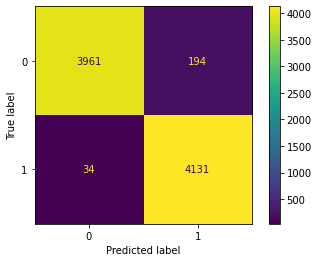

In [119]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import itertools
cm=confusion_matrix(Y_test,X_test_pred)
ConfusionMatrixDisplay(cm).plot()

In [ ]:
plot_confusion_matrix(cm)

In [120]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,X_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      4155
           1       0.96      0.99      0.97      4165

    accuracy                           0.97      8320
   macro avg       0.97      0.97      0.97      8320
weighted avg       0.97      0.97      0.97      8320



In [121]:
from sklearn.svm import LinearSVC

In [122]:
sv=LinearSVC()
sv.fit(X_train,Y_train)

LinearSVC()

In [123]:
X_train_pred = sv.predict(X_train)
td_ac = accuracy_score(X_train_pred, Y_train)

In [124]:
print(" Accuracy score for the traing data : ",td_ac*100)

 Accuracy score for the traing data :  99.94391025641025


In [125]:
X_test_pred = sv.predict(X_test)
td_ac = accuracy_score(X_test_pred, Y_test )

In [126]:
print(" Accuracy score for the testing data : ",td_ac*100)

 Accuracy score for the testing data :  99.20673076923077


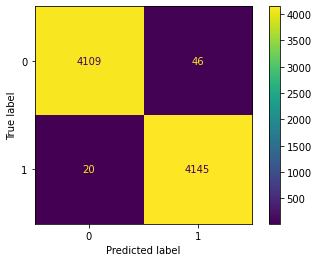

In [127]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import itertools
cm=confusion_matrix(Y_test,X_test_pred)
ConfusionMatrixDisplay(cm).plot()

In [128]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,X_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4155
           1       0.99      1.00      0.99      4165

    accuracy                           0.99      8320
   macro avg       0.99      0.99      0.99      8320
weighted avg       0.99      0.99      0.99      8320



In [129]:
from sklearn.naive_bayes import MultinomialNB

In [130]:
nv=MultinomialNB()
nv.fit(X_train,Y_train)

MultinomialNB()

In [ ]:
X_train_pred = nv.predict(X_train)
td_ac = accuracy_score(X_train_pred, Y_train)

In [131]:
print(" Accuracy score for the traing data : ",td_ac*100)

 Accuracy score for the traing data :  99.20673076923077


In [132]:
X_test_pred = nv.predict(X_test)
td_ac = accuracy_score(X_test_pred, Y_test )

In [133]:
print(" Accuracy score for the testing data : ",td_ac*100)

 Accuracy score for the testing data :  94.93990384615385


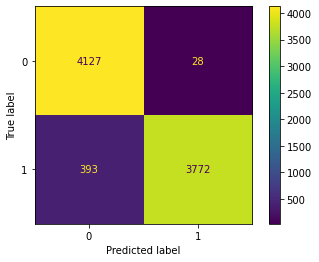

In [134]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import itertools
cm=confusion_matrix(Y_test,X_test_pred)
ConfusionMatrixDisplay(cm).plot()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,X_test_pred))